In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#load the dataset
df = pd.read_csv('../data/southern.csv')

In [3]:
#check column wise info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     10 non-null     object 
 1   Reviews   10 non-null     int64  
 2   Rating    10 non-null     float64
 3   Category  10 non-null     object 
 4   Location  10 non-null     object 
 5   Duration  10 non-null     int64  
 6   Budget    10 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 688.0+ bytes


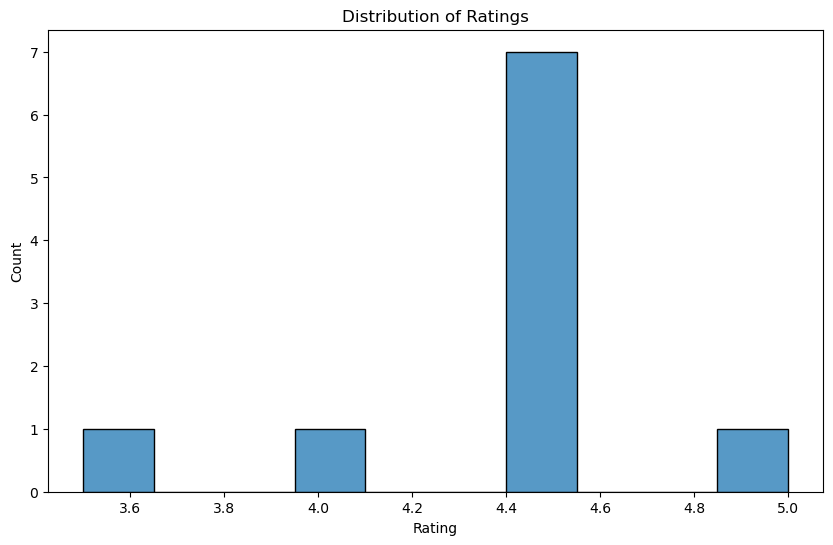

In [4]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

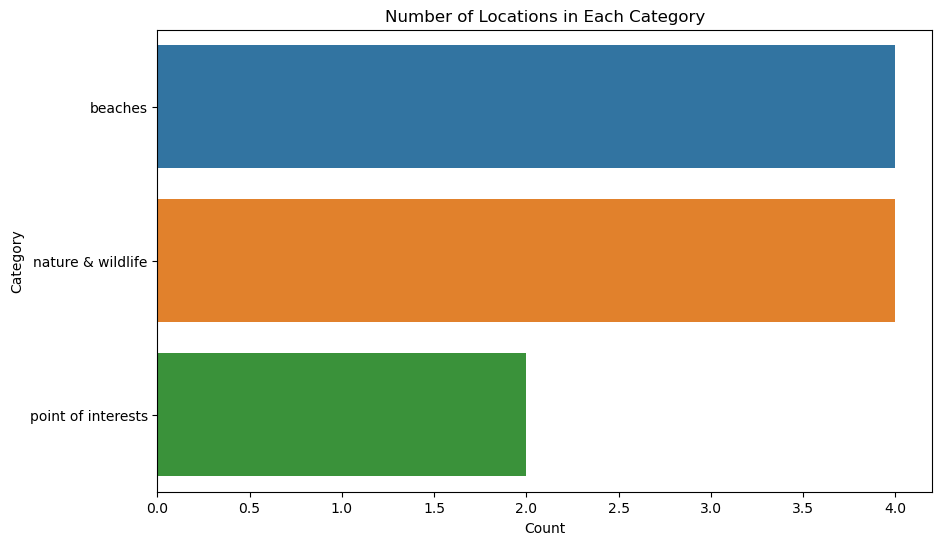

In [5]:
# Plot the number of locations in each category
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Locations in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

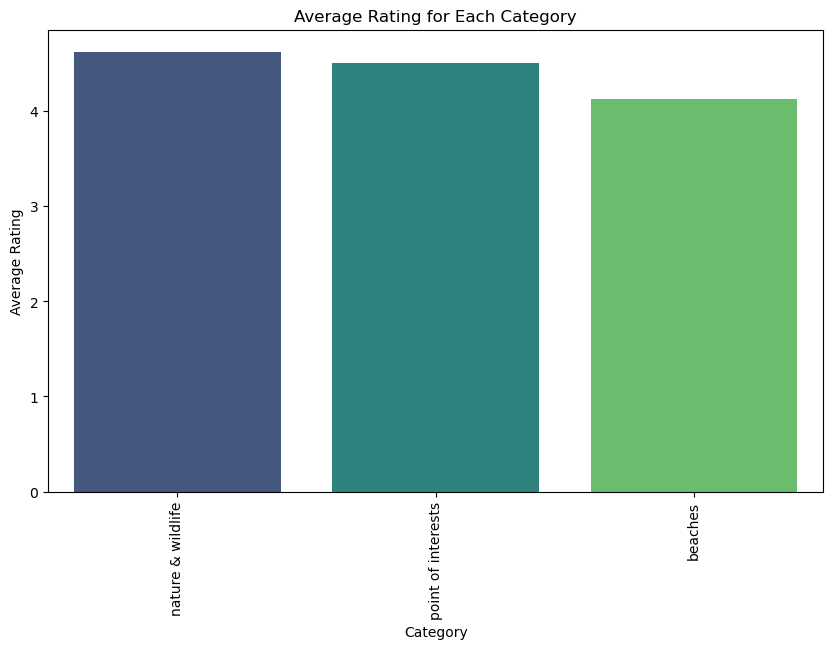

In [6]:
# Plot the average rating for each category
category_mean = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_mean.index, y=category_mean.values, palette='viridis')
plt.title('Average Rating for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Combine the 'Location', 'Category', 'Rating', and 'Reviews' columns into a single 'Features' column
df['Features'] = df['Location'] + ' ' + df['Category'] + ' ' + df['Rating'].astype(str) + ' ' + df['Reviews'].astype(str)

# Calculate TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
df['Features'] = df['Features'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['Features'])

# Calculate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to recommend locations based on similarity score
def recommend_locations_based_on_features(index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:11]
    location_indices = [i[0] for i in sim_scores]
    recommended_locations = df.iloc[location_indices]
    return recommended_locations

# Get user input
user_input_location = "Galle"
user_input_category = "point of interests"

# Find the index of the location that matches the user's input
location_index = df.loc[(df['Location'] == user_input_location) & (df['Category'] == user_input_category)].index[0]

# Recommend locations based on the user's input
recommendations = recommend_locations_based_on_features(location_index)
print(recommendations.to_string(index='False'))

                                             Title  Reviews  Rating            Category   Location  Duration  Budget                             Features
0                                       Galle Fort     3516     4.5  point of interests      Galle         3       0    Galle point of interests 4.5 3516
2         Old Town of Galle and its Fortifications     3511     4.5  point of interests      Galle         1       0    Galle point of interests 4.5 3511
4                 Sea Turtle Farm Galle Mahamodara     1076     4.5   nature & wildlife      Galle         2      30     Galle nature & wildlife 4.5 1076
1                                    Bentota Beach     2305     4.5             beaches    Bentota         1       0             Bentota beaches 4.5 2305
3                                    Mirissa Beach     3095     4.5             beaches    Mirissa         1       0             Mirissa beaches 4.5 3095
5                                  Hikkaduwa Beach     2383     4.0         

In [8]:
# Convert the DataFrame to a list of dictionaries
recommendations_list = recommendations.to_dict('records')

# print the results as a JSON string
print(json.dumps(
    {
        "location": recommendations_list, 
        #"accomadation": result2,
        #"food": "dasd"
    }
))

{"location": [{"Title": "Galle Fort", "Reviews": 3516, "Rating": 4.5, "Category": "point of interests", "Location": "Galle", "Duration": 3, "Budget": 0, "Features": "Galle point of interests 4.5 3516"}, {"Title": "Old Town of Galle and its Fortifications", "Reviews": 3511, "Rating": 4.5, "Category": "point of interests", "Location": "Galle", "Duration": 1, "Budget": 0, "Features": "Galle point of interests 4.5 3511"}, {"Title": "Sea Turtle Farm Galle Mahamodara", "Reviews": 1076, "Rating": 4.5, "Category": "nature & wildlife", "Location": "Galle", "Duration": 2, "Budget": 30, "Features": "Galle nature & wildlife 4.5 1076"}, {"Title": "Bentota Beach", "Reviews": 2305, "Rating": 4.5, "Category": "beaches", "Location": "Bentota", "Duration": 1, "Budget": 0, "Features": "Bentota beaches 4.5 2305"}, {"Title": "Mirissa Beach", "Reviews": 3095, "Rating": 4.5, "Category": "beaches", "Location": "Mirissa", "Duration": 1, "Budget": 0, "Features": "Mirissa beaches 4.5 3095"}, {"Title": "Hikkaduwa

In [9]:
# Assume we have a list of actual items the user interacted with
actual = ['Galle', 'Bentota', 'Mirissa']

# Assume we have a list of items recommended by the system
recommended = ['Galle', 'Galle', 'Bentota']

# Calculate precision and recall
precision = len(set(recommended) & set(actual)) / len(set(recommended))
recall = len(set(recommended) & set(actual)) / len(set(actual))

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 1.0
Recall: 0.6666666666666666
